In [10]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
from tqdm import tqdm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Pair Programming Random Forest


### Ana G y Ana C

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Random Forest en este tipo de problemas. 

Los objetivos de este pair programming :

- Ajustad un modelo de Random Forest a nuestros datos.
- Calculad las métricas a nuestro nuevo modelo.
- Comparad las métricas con los modelos hechos hasta ahora. ¿Cuál es mejor?

In [11]:
df_esta = pd.read_csv("../data-log/02-df_estandarizadas_codificadas.csv", index_col=0)
df_esta.drop('id', axis=1, inplace=True)
df_esta.head(2)

sex  education  is_smoking  BPMeds  prevalentStroke  prevalentHyp  \
0    1        2.0           1     0.0              0.0           0.0   
1    1        1.0           1     0.0              0.0           0.0   

   diabetes  TenYearCHD       age  cigsPerDay   glucose   totChol     sysBP  \
0       0.0         1.0  1.071429        0.15  0.153846 -0.224138  0.722222   
1       0.0         0.0 -0.214286        0.50  1.230769  0.275862 -0.462963   

      diaBP       BMI  heartRate  
0  0.193548  0.136595   1.000000  
1 -0.709677 -1.009027   0.866667

In [12]:
df_noesta = pd.read_csv("../data-log/02-df_codifcadas_no_estandarizadas.csv", index_col=0)
df_noesta.drop('id', axis=1, inplace=True)
df_noesta.head(2)

sex  education   age  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0    1        2.0  64.0           1         3.0     0.0              0.0   
1    1        1.0  46.0           1        10.0     0.0              0.0   

   prevalentHyp  diabetes  glucose  totChol  sysBP  diaBP        BMI  \
0           0.0       0.0     80.0    221.0  148.0   85.0  26.060925   
1           0.0       0.0     94.0    250.0  116.0   71.0  20.350000   

   heartRate  TenYearCHD  
0       90.0         1.0  
1       88.0         0.0

In [13]:
df_bal = pd.read_csv("../data-log/02-bal_est_cod.csv", index_col=0)
df_bal.dropna(inplace=True)
df_bal.isnull().sum()

sex                0
education          0
is_smoking         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
age                0
cigsPerDay         0
glucose            0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

---

# 1. Datos  no estandarizadas, no balanceado

In [14]:
# separamos los datos en X e y

X1 = df_noesta.drop("TenYearCHD", axis = 1)
y1 = df_noesta["TenYearCHD"]

In [15]:
# y dividir nuestros datos en train y test para poder evaluar la bondad de nuestro modelo

x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [16]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"max_depth": [2,4, 6, 10, 12, 14], 
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [17]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla
        

In [18]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [19]:
# saquemos ahora cual es nuestro mejor bosque

bosque = gs_rf.best_estimator_
bosque

RandomForestClassifier(max_depth=14, max_features=3, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [20]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [21]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [22]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "6.Random Forest NO Estandarizada Codificada")
dt_results

accuracy  precision    recall        f1    kapppa    set  \
0  0.840708   0.500000  0.009259  0.018182  0.012462   test   
1  0.856932   0.941176  0.039702  0.076190  0.064942  train   

                                        modelo  
0  6.Random Forest NO Estandarizada Codificada  
1  6.Random Forest NO Estandarizada Codificada

In [23]:
# igual que en la clase de decision tree, juntemos estos resultados con los obtenidos en los modelos que hemos hecho hasta ahora
# lo primero que tenemos que hacer es cargar el csv con todos los resultados que guardamos en el jupyter anterior

df_LR_DT_results = pd.read_csv('../data-log/05-Metricas_Decision_Tree.csv', index_col = 0)
df_LR_DT_results

accuracy  precision    recall        f1    kapppa    set  \
0   0.716495   0.568627  0.324022  0.412811  0.244013   test   
1   0.723322   0.585752  0.313559  0.408464  0.248900  train   
2   0.805310   0.357143  0.277778  0.312500  0.201157   test   
3   0.815265   0.360000  0.312655  0.334661  0.228020  train   
4   0.846608   0.750000  0.055556  0.103448  0.083307   test   
5   0.861357   0.775510  0.094293  0.168142  0.140448  train   
6   0.756637   0.275591  0.324074  0.297872  0.151845   test   
7   1.000000   1.000000  1.000000  1.000000  1.000000  train   
8   0.839233   0.428571  0.027778  0.052174  0.033430   test   
9   0.854351   0.605263  0.057072  0.104308  0.080768  train   
10  0.733038   0.212598  0.250000  0.229787  0.069599   test   
11  1.000000   1.000000  1.000000  1.000000  1.000000  train   
12  0.839233   0.428571  0.027778  0.052174  0.033430   test   
13  0.854351   0.605263  0.057072  0.104308  0.080768  train   
14  0.774914   0.637931  0.620112  0.628895  0.467413   test   
15  1.000000   1.000000  1.000000  1.000000  1.000000  train   

                                               modelo  
0   Regresión logistica Balanceada Estandarizada C...  
1   Regresión logistica Balanceada Estandarizada C...  
2        Regresión logistica Estandarizada Codificada  
3        Regresión logistica Estandarizada Codificada  
4     Regresión logistica NO Estandarizada Codificada  
5     Regresión logistica NO Estandarizada Codificada  
6                          1.Decission Tree NO Esta I  
7                          1.Decission Tree NO Esta I  
8                           2.DecisionTree NO Esta II  
9                           2.DecisionTree NO Esta II  
10                            3.Decission Tree Esta I  
11                            3.Decission Tree Esta I  
12                             4.DecisionTree Esta II  
13                             4.DecisionTree Esta II  
14                      5.Decission Tree Balanceada I  
15                      5.Decission Tree Balanceada I

In [24]:
# concatenamos el csv anterior con los resultados obtenidos en este modelo

df_todos_resultados = pd.concat([dt_results, df_LR_DT_results], axis = 0)
df_todos_resultados

accuracy  precision    recall        f1    kapppa    set  \
0   0.840708   0.500000  0.009259  0.018182  0.012462   test   
1   0.856932   0.941176  0.039702  0.076190  0.064942  train   
0   0.716495   0.568627  0.324022  0.412811  0.244013   test   
1   0.723322   0.585752  0.313559  0.408464  0.248900  train   
2   0.805310   0.357143  0.277778  0.312500  0.201157   test   
3   0.815265   0.360000  0.312655  0.334661  0.228020  train   
4   0.846608   0.750000  0.055556  0.103448  0.083307   test   
5   0.861357   0.775510  0.094293  0.168142  0.140448  train   
6   0.756637   0.275591  0.324074  0.297872  0.151845   test   
7   1.000000   1.000000  1.000000  1.000000  1.000000  train   
8   0.839233   0.428571  0.027778  0.052174  0.033430   test   
9   0.854351   0.605263  0.057072  0.104308  0.080768  train   
10  0.733038   0.212598  0.250000  0.229787  0.069599   test   
11  1.000000   1.000000  1.000000  1.000000  1.000000  train   
12  0.839233   0.428571  0.027778  0.052174  0.033430   test   
13  0.854351   0.605263  0.057072  0.104308  0.080768  train   
14  0.774914   0.637931  0.620112  0.628895  0.467413   test   
15  1.000000   1.000000  1.000000  1.000000  1.000000  train   

                                               modelo  
0         6.Random Forest NO Estandarizada Codificada  
1         6.Random Forest NO Estandarizada Codificada  
0   Regresión logistica Balanceada Estandarizada C...  
1   Regresión logistica Balanceada Estandarizada C...  
2        Regresión logistica Estandarizada Codificada  
3        Regresión logistica Estandarizada Codificada  
4     Regresión logistica NO Estandarizada Codificada  
5     Regresión logistica NO Estandarizada Codificada  
6                          1.Decission Tree NO Esta I  
7                          1.Decission Tree NO Esta I  
8                           2.DecisionTree NO Esta II  
9                           2.DecisionTree NO Esta II  
10                            3.Decission Tree Esta I  
11                            3.Decission Tree Esta I  
12                             4.DecisionTree Esta II  
13                             4.DecisionTree Esta II  
14                      5.Decission Tree Balanceada I  
15                      5.Decission Tree Balanceada I

In [25]:
df_todos_resultados.to_csv('../data-log/05-Metricas_Decision_Tree.csv')

Importancia de las variables

In [26]:

# vamos a crearnos un dataframe, igual que hicimos en la clase anterior con la importancia de cada una de las variables incluidas en el modelo

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
2               age     0.166295
11            sysBP     0.148113
9           glucose     0.112186
12            diaBP     0.111163
10          totChol     0.105254
13              BMI     0.099155
14        heartRate     0.077592
4        cigsPerDay     0.060400
7      prevalentHyp     0.031800
1         education     0.029813
0               sex     0.026916
3        is_smoking     0.014157
5            BPMeds     0.008116
8          diabetes     0.007836
6   prevalentStroke     0.001205

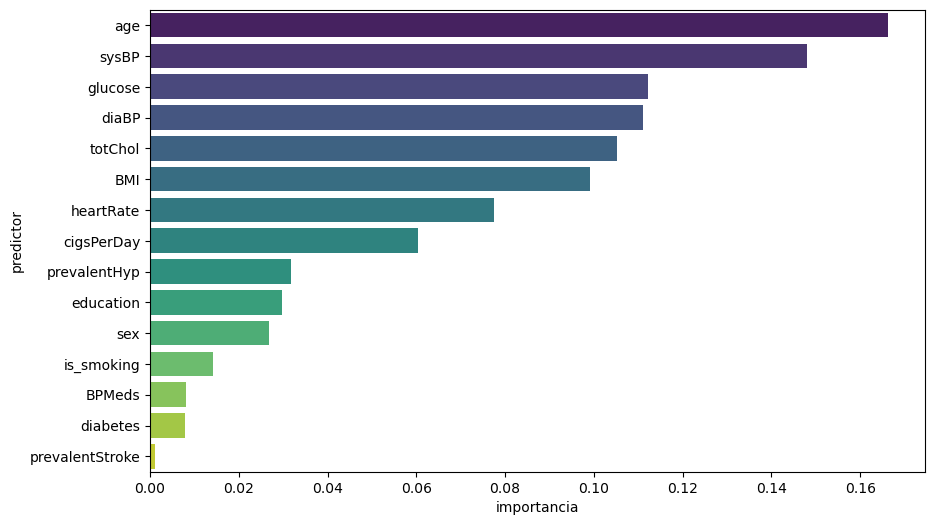

In [27]:
# por último ploteamos los resultados

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

---

# 2. Estandarizadas y no balanceado

In [28]:
# separamos los datos en X e y

X2 = df_esta.drop("TenYearCHD", axis = 1)
y2 = df_esta["TenYearCHD"]

In [29]:
# y dividir nuestros datos en train y test para poder evaluar la bondad de nuestro modelo

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [30]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param2 = {"max_depth": [2,4, 6, 10, 12, 14], 
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [31]:
gs_rf2 = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), # tipo de modelo que queremos hacer
            param_grid= param2, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla
        

In [32]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs_rf2.fit(x_train2, y_train2)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [33]:
# saquemos ahora cual es nuestro mejor bosque

bosque2 = gs_rf2.best_estimator_
bosque2

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [34]:
y_pred_test_rf2 = bosque2.predict(x_test2)
y_pred_train_rf2 = bosque2.predict(x_train2)

In [35]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results2 = metricas(y_test2, y_pred_test_rf2,y_train2,  y_pred_train_rf2, "7.Random Forest Estandarizada Codificada")
dt_results2

accuracy  precision    recall        f1    kapppa    set  \
0  0.842183   0.571429  0.037037  0.069565  0.051165   test   
1  0.861357   0.965517  0.069479  0.129630  0.111912  train   

                                     modelo  
0  7.Random Forest Estandarizada Codificada  
1  7.Random Forest Estandarizada Codificada

In [36]:
# igual que en la clase de decision tree, juntemos estos resultados con los obtenidos en los modelos que hemos hecho hasta ahora
# lo primero que tenemos que hacer es cargar el csv con todos los resultados que guardamos en el jupyter anterior

df_LR_DT_results2 = pd.read_csv('../data-log/05-Metricas_Decision_Tree.csv', index_col = 0)
df_LR_DT_results2

accuracy  precision    recall        f1    kapppa    set  \
0   0.840708   0.500000  0.009259  0.018182  0.012462   test   
1   0.856932   0.941176  0.039702  0.076190  0.064942  train   
0   0.716495   0.568627  0.324022  0.412811  0.244013   test   
1   0.723322   0.585752  0.313559  0.408464  0.248900  train   
2   0.805310   0.357143  0.277778  0.312500  0.201157   test   
3   0.815265   0.360000  0.312655  0.334661  0.228020  train   
4   0.846608   0.750000  0.055556  0.103448  0.083307   test   
5   0.861357   0.775510  0.094293  0.168142  0.140448  train   
6   0.756637   0.275591  0.324074  0.297872  0.151845   test   
7   1.000000   1.000000  1.000000  1.000000  1.000000  train   
8   0.839233   0.428571  0.027778  0.052174  0.033430   test   
9   0.854351   0.605263  0.057072  0.104308  0.080768  train   
10  0.733038   0.212598  0.250000  0.229787  0.069599   test   
11  1.000000   1.000000  1.000000  1.000000  1.000000  train   
12  0.839233   0.428571  0.027778  0.052174  0.033430   test   
13  0.854351   0.605263  0.057072  0.104308  0.080768  train   
14  0.774914   0.637931  0.620112  0.628895  0.467413   test   
15  1.000000   1.000000  1.000000  1.000000  1.000000  train   

                                               modelo  
0         6.Random Forest NO Estandarizada Codificada  
1         6.Random Forest NO Estandarizada Codificada  
0   Regresión logistica Balanceada Estandarizada C...  
1   Regresión logistica Balanceada Estandarizada C...  
2        Regresión logistica Estandarizada Codificada  
3        Regresión logistica Estandarizada Codificada  
4     Regresión logistica NO Estandarizada Codificada  
5     Regresión logistica NO Estandarizada Codificada  
6                          1.Decission Tree NO Esta I  
7                          1.Decission Tree NO Esta I  
8                           2.DecisionTree NO Esta II  
9                           2.DecisionTree NO Esta II  
10                            3.Decission Tree Esta I  
11                            3.Decission Tree Esta I  
12                             4.DecisionTree Esta II  
13                             4.DecisionTree Esta II  
14                      5.Decission Tree Balanceada I  
15                      5.Decission Tree Balanceada I

In [37]:
# concatenamos el csv anterior con los resultados obtenidos en este modelo

df_todos_resultados2 = pd.concat([dt_results2, df_LR_DT_results2], axis = 0)
df_todos_resultados2

accuracy  precision    recall        f1    kapppa    set  \
0   0.842183   0.571429  0.037037  0.069565  0.051165   test   
1   0.861357   0.965517  0.069479  0.129630  0.111912  train   
0   0.840708   0.500000  0.009259  0.018182  0.012462   test   
1   0.856932   0.941176  0.039702  0.076190  0.064942  train   
0   0.716495   0.568627  0.324022  0.412811  0.244013   test   
1   0.723322   0.585752  0.313559  0.408464  0.248900  train   
2   0.805310   0.357143  0.277778  0.312500  0.201157   test   
3   0.815265   0.360000  0.312655  0.334661  0.228020  train   
4   0.846608   0.750000  0.055556  0.103448  0.083307   test   
5   0.861357   0.775510  0.094293  0.168142  0.140448  train   
6   0.756637   0.275591  0.324074  0.297872  0.151845   test   
7   1.000000   1.000000  1.000000  1.000000  1.000000  train   
8   0.839233   0.428571  0.027778  0.052174  0.033430   test   
9   0.854351   0.605263  0.057072  0.104308  0.080768  train   
10  0.733038   0.212598  0.250000  0.229787  0.069599   test   
11  1.000000   1.000000  1.000000  1.000000  1.000000  train   
12  0.839233   0.428571  0.027778  0.052174  0.033430   test   
13  0.854351   0.605263  0.057072  0.104308  0.080768  train   
14  0.774914   0.637931  0.620112  0.628895  0.467413   test   
15  1.000000   1.000000  1.000000  1.000000  1.000000  train   

                                               modelo  
0            7.Random Forest Estandarizada Codificada  
1            7.Random Forest Estandarizada Codificada  
0         6.Random Forest NO Estandarizada Codificada  
1         6.Random Forest NO Estandarizada Codificada  
0   Regresión logistica Balanceada Estandarizada C...  
1   Regresión logistica Balanceada Estandarizada C...  
2        Regresión logistica Estandarizada Codificada  
3        Regresión logistica Estandarizada Codificada  
4     Regresión logistica NO Estandarizada Codificada  
5     Regresión logistica NO Estandarizada Codificada  
6                          1.Decission Tree NO Esta I  
7                          1.Decission Tree NO Esta I  
8                           2.DecisionTree NO Esta II  
9                           2.DecisionTree NO Esta II  
10                            3.Decission Tree Esta I  
11                            3.Decission Tree Esta I  
12                             4.DecisionTree Esta II  
13                             4.DecisionTree Esta II  
14                      5.Decission Tree Balanceada I  
15                      5.Decission Tree Balanceada I

In [38]:
df_todos_resultados2.to_csv('../data-log/05-Metricas_Decision_Tree.csv')

Importancia de las variables

In [39]:
# vamos a crearnos un dataframe
importancia_predictores2= pd.DataFrame(
                            {'predictor': x_train2.columns,
                             'importancia': bosque2.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores2.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores2

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
7               age     0.171529
11            sysBP     0.151380
9           glucose     0.132908
10          totChol     0.106147
12            diaBP     0.104975
13              BMI     0.101076
14        heartRate     0.064769
8        cigsPerDay     0.060484
5      prevalentHyp     0.032544
0               sex     0.028718
1         education     0.025660
2        is_smoking     0.006967
3            BPMeds     0.006352
6          diabetes     0.005547
4   prevalentStroke     0.000944

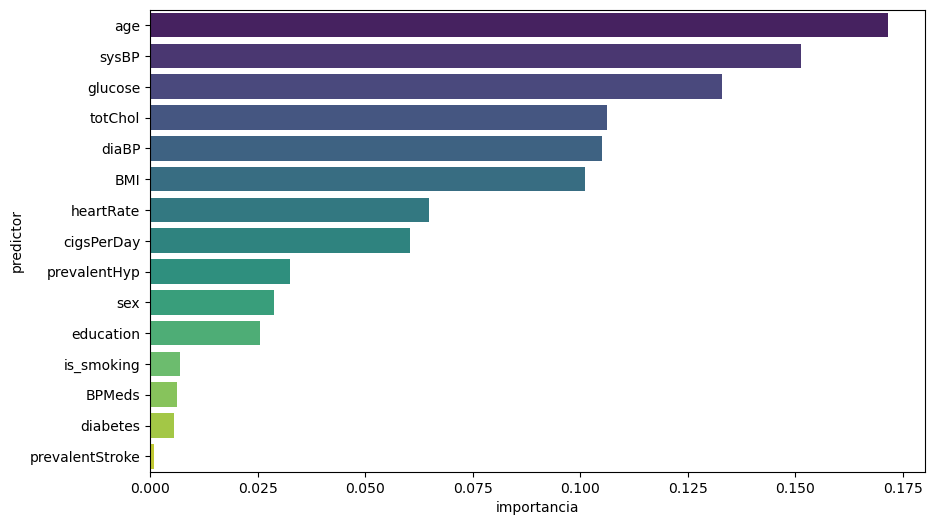

In [40]:
# por último ploteamos los resultados  

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores2, palette="viridis");
plt.show()

---

# 3. Balanceada, estandarizadas

In [41]:
# separamos los datos en X e y

X3 = df_noesta.drop("TenYearCHD", axis = 1)
y3 = df_noesta["TenYearCHD"]

In [42]:
# y dividir nuestros datos en train y test para poder evaluar la bondad de nuestro modelo

x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [43]:
param3 = {"max_depth": [2,4, 6, 10, 12, 14], 
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [44]:
gs_rf3 = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), # tipo de modelo que queremos hacer
            param_grid= param3, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation  
            verbose=-1) 
        

In [45]:
# ajustamos el modelo que acabamos de definir en el GridSearch
gs_rf3.fit(x_train3, y_train3)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [46]:
# saquemos ahora cual es nuestro mejor bosque

bosque3 = gs_rf3.best_estimator_
bosque3

RandomForestClassifier(max_depth=14, max_features=3, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [47]:
y_pred_test_rf3 = bosque3.predict(x_test3)
y_pred_train_rf3 = bosque3.predict(x_train3)

In [48]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results3 = metricas(y_test3, y_pred_test_rf3,y_train3,  y_pred_train_rf3, "8.Random Forest Balanceada Estandarizada")
dt_results3

accuracy  precision    recall        f1    kapppa    set  \
0  0.840708   0.500000  0.009259  0.018182  0.012462   test   
1  0.856932   0.941176  0.039702  0.076190  0.064942  train   

                                     modelo  
0  8.Random Forest Balanceada Estandarizada  
1  8.Random Forest Balanceada Estandarizada

In [49]:
# juntemos estos resultados con los obtenidos en los modelos que hemos hecho hasta ahora
df_LR_DT_results3 = pd.read_csv('../data-log/05-Metricas_Decision_Tree.csv', index_col = 0)
df_LR_DT_results3

accuracy  precision    recall        f1    kapppa    set  \
0   0.842183   0.571429  0.037037  0.069565  0.051165   test   
1   0.861357   0.965517  0.069479  0.129630  0.111912  train   
0   0.840708   0.500000  0.009259  0.018182  0.012462   test   
1   0.856932   0.941176  0.039702  0.076190  0.064942  train   
0   0.716495   0.568627  0.324022  0.412811  0.244013   test   
1   0.723322   0.585752  0.313559  0.408464  0.248900  train   
2   0.805310   0.357143  0.277778  0.312500  0.201157   test   
3   0.815265   0.360000  0.312655  0.334661  0.228020  train   
4   0.846608   0.750000  0.055556  0.103448  0.083307   test   
5   0.861357   0.775510  0.094293  0.168142  0.140448  train   
6   0.756637   0.275591  0.324074  0.297872  0.151845   test   
7   1.000000   1.000000  1.000000  1.000000  1.000000  train   
8   0.839233   0.428571  0.027778  0.052174  0.033430   test   
9   0.854351   0.605263  0.057072  0.104308  0.080768  train   
10  0.733038   0.212598  0.250000  0.229787  0.069599   test   
11  1.000000   1.000000  1.000000  1.000000  1.000000  train   
12  0.839233   0.428571  0.027778  0.052174  0.033430   test   
13  0.854351   0.605263  0.057072  0.104308  0.080768  train   
14  0.774914   0.637931  0.620112  0.628895  0.467413   test   
15  1.000000   1.000000  1.000000  1.000000  1.000000  train   

                                               modelo  
0            7.Random Forest Estandarizada Codificada  
1            7.Random Forest Estandarizada Codificada  
0         6.Random Forest NO Estandarizada Codificada  
1         6.Random Forest NO Estandarizada Codificada  
0   Regresión logistica Balanceada Estandarizada C...  
1   Regresión logistica Balanceada Estandarizada C...  
2        Regresión logistica Estandarizada Codificada  
3        Regresión logistica Estandarizada Codificada  
4     Regresión logistica NO Estandarizada Codificada  
5     Regresión logistica NO Estandarizada Codificada  
6                          1.Decission Tree NO Esta I  
7                          1.Decission Tree NO Esta I  
8                           2.DecisionTree NO Esta II  
9                           2.DecisionTree NO Esta II  
10                            3.Decission Tree Esta I  
11                            3.Decission Tree Esta I  
12                             4.DecisionTree Esta II  
13                             4.DecisionTree Esta II  
14                      5.Decission Tree Balanceada I  
15                      5.Decission Tree Balanceada I

In [55]:
# concatenamos el csv anterior con los resultados obtenidos en este modelo

df_todos_resultados3 = pd.concat([dt_results3, df_LR_DT_results3], axis = 0).reset_index()
df_todos_resultados3

index  accuracy  precision    recall        f1    kapppa    set  \
0       0  0.840708   0.500000  0.009259  0.018182  0.012462   test   
1       1  0.856932   0.941176  0.039702  0.076190  0.064942  train   
2       0  0.842183   0.571429  0.037037  0.069565  0.051165   test   
3       1  0.861357   0.965517  0.069479  0.129630  0.111912  train   
4       0  0.840708   0.500000  0.009259  0.018182  0.012462   test   
5       1  0.856932   0.941176  0.039702  0.076190  0.064942  train   
6       0  0.716495   0.568627  0.324022  0.412811  0.244013   test   
7       1  0.723322   0.585752  0.313559  0.408464  0.248900  train   
8       2  0.805310   0.357143  0.277778  0.312500  0.201157   test   
9       3  0.815265   0.360000  0.312655  0.334661  0.228020  train   
10      4  0.846608   0.750000  0.055556  0.103448  0.083307   test   
11      5  0.861357   0.775510  0.094293  0.168142  0.140448  train   
12      6  0.756637   0.275591  0.324074  0.297872  0.151845   test   
13      7  1.000000   1.000000  1.000000  1.000000  1.000000  train   
14      8  0.839233   0.428571  0.027778  0.052174  0.033430   test   
15      9  0.854351   0.605263  0.057072  0.104308  0.080768  train   
16     10  0.733038   0.212598  0.250000  0.229787  0.069599   test   
17     11  1.000000   1.000000  1.000000  1.000000  1.000000  train   
18     12  0.839233   0.428571  0.027778  0.052174  0.033430   test   
19     13  0.854351   0.605263  0.057072  0.104308  0.080768  train   
20     14  0.774914   0.637931  0.620112  0.628895  0.467413   test   
21     15  1.000000   1.000000  1.000000  1.000000  1.000000  train   

                                               modelo  
0            8.Random Forest Balanceada Estandarizada  
1            8.Random Forest Balanceada Estandarizada  
2            7.Random Forest Estandarizada Codificada  
3            7.Random Forest Estandarizada Codificada  
4         6.Random Forest NO Estandarizada Codificada  
5         6.Random Forest NO Estandarizada Codificada  
6   Regresión logistica Balanceada Estandarizada C...  
7   Regresión logistica Balanceada Estandarizada C...  
8        Regresión logistica Estandarizada Codificada  
9        Regresión logistica Estandarizada Codificada  
10    Regresión logistica NO Estandarizada Codificada  
11    Regresión logistica NO Estandarizada Codificada  
12                         1.Decission Tree NO Esta I  
13                         1.Decission Tree NO Esta I  
14                          2.DecisionTree NO Esta II  
15                          2.DecisionTree NO Esta II  
16                            3.Decission Tree Esta I  
17                            3.Decission Tree Esta I  
18                             4.DecisionTree Esta II  
19                             4.DecisionTree Esta II  
20                      5.Decission Tree Balanceada I  
21                      5.Decission Tree Balanceada I

In [56]:
df_todos_resultados3.style.background_gradient(cmap='PuOr')

In [57]:
df_todos_resultados3.to_csv('../data-log/05-Metricas_Decision_Tree.csv')

Importancia de las variables

In [58]:

# vamos a crearnos un dataframe, con la importancia de cada una de las variables incluidas en el modelo

importancia_predictores3 = pd.DataFrame(
                            {'predictor': x_train3.columns,
                             'importancia': bosque3.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores3.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores3

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
2               age     0.166295
11            sysBP     0.148113
9           glucose     0.112186
12            diaBP     0.111163
10          totChol     0.105254
13              BMI     0.099155
14        heartRate     0.077592
4        cigsPerDay     0.060400
7      prevalentHyp     0.031800
1         education     0.029813
0               sex     0.026916
3        is_smoking     0.014157
5            BPMeds     0.008116
8          diabetes     0.007836
6   prevalentStroke     0.001205

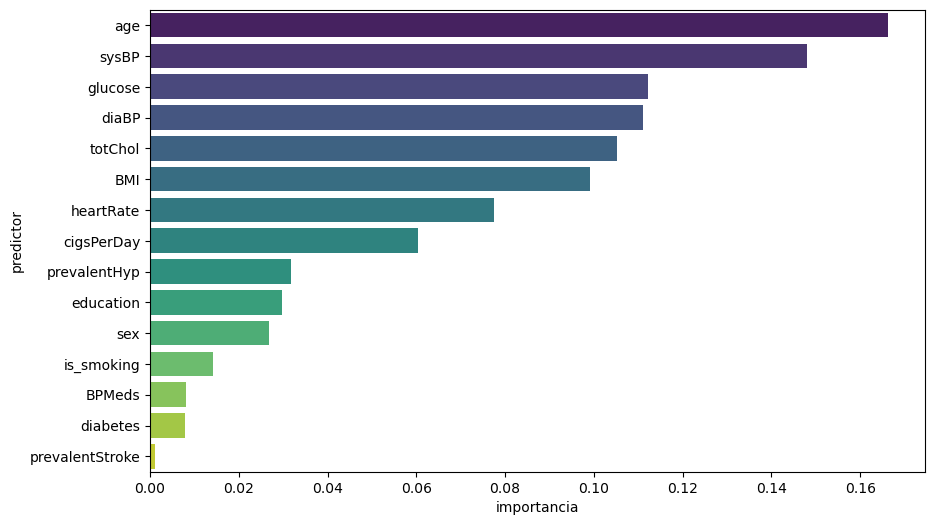

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores3, palette="viridis");
plt.show()

## Seguimos manteniendo la conclusión del pair anterior, nuestros resultados, no han mejorado.